<a href="https://colab.research.google.com/github/sefrancogo/Prueba-Ifood/blob/main/DataAnalystCase_Ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio
  


In [ ]:
#Importar librerías
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import joblib 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, roc_curve,roc_auc_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
np.random.seed(42)

In [ ]:
url = "/content/drive/MyDrive/BDIfoodPrueba/ml_project1_data.csv"
data = pd.read_csv(url)
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


Se carga la BD


In [ ]:
print(data.shape)
data.info()

(2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 n

Se verifica el tipo de datos que contiene la BD

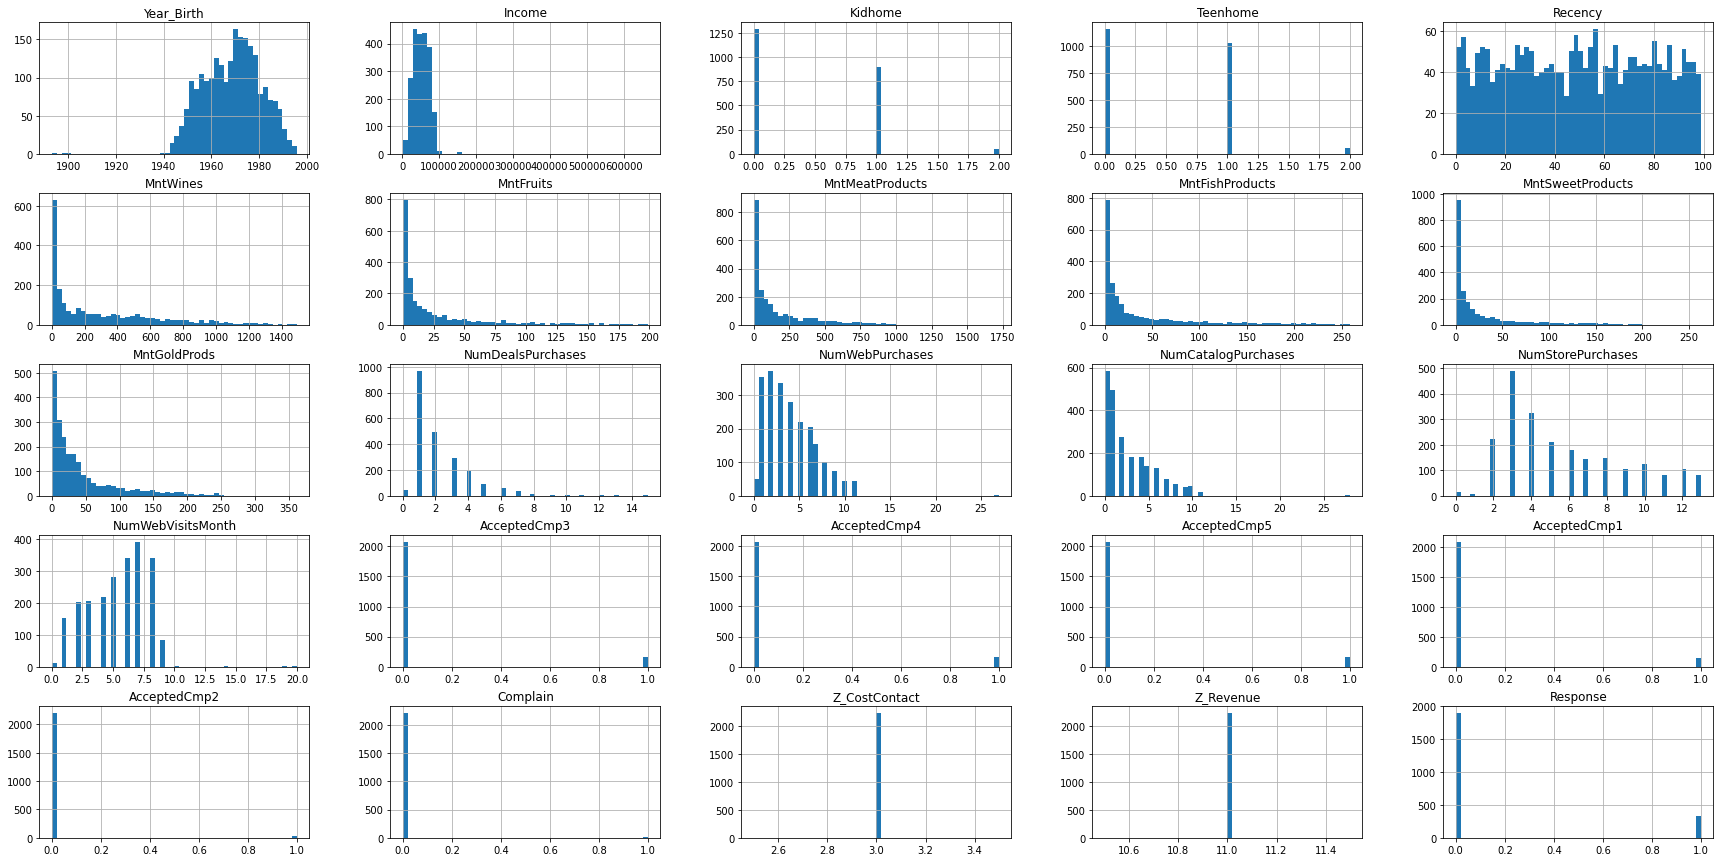

In [ ]:
data_describe = data.drop(['ID','Education','Marital_Status','Dt_Customer'],axis=1)
data_describe.hist(bins=50,figsize=(30,15))
#plt.tignt_layout()
plt.show()

Se realiza un analisis basico por cada variable para comprender su comportamiento e identificar atributos relevantes

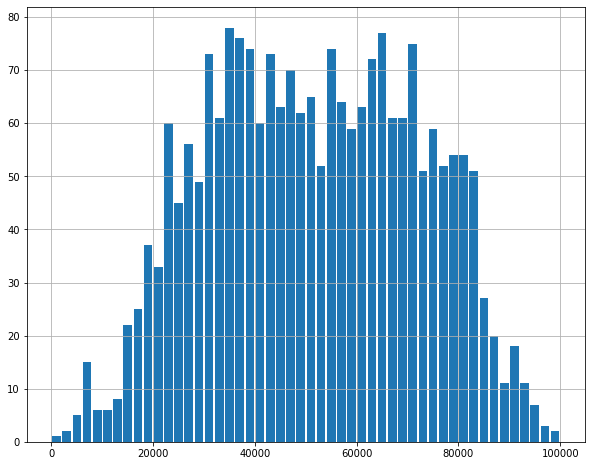

<Figure size 720x432 with 0 Axes>

In [ ]:
ax = plt.subplots(figsize=(10, 8))
ax = data_describe['Income'].hist(bins=50, range=(0,100000), rwidth=0.85)
plt.figure(figsize=(10,6))
plt.show()

Se realiza un zoom en el atributo Income

In [ ]:
data_describe = data_describe.drop(['Z_CostContact','Z_Revenue'],axis=1)
data_describe.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,0


Se eliminan los atributos que no van a ser tenidos encuenta para el análisis

In [ ]:
corr_matrix = data_describe.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Year_Birth,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,0.021325
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,0.133047
Kidhome,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008
Teenhome,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446
Recency,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437
MntWines,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331
MntSweetProducts,-0.018133,0.440744,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,-0.120100,0.348544,0.490924,0.448756,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985,-0.022485,0.117372


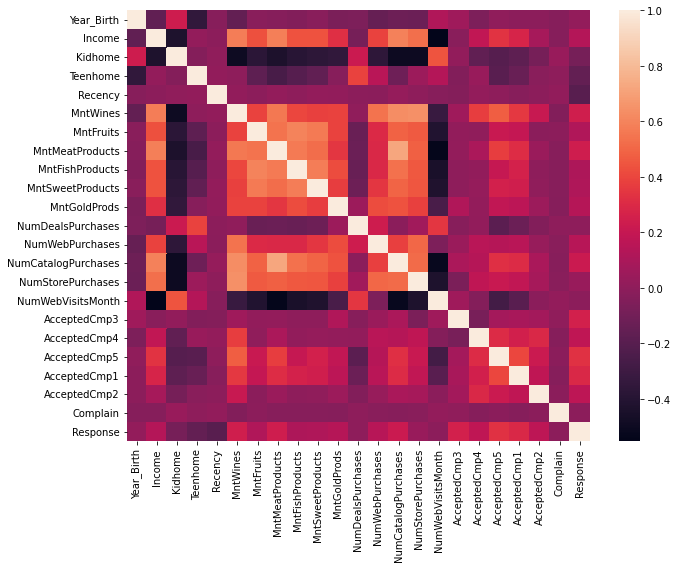

In [ ]:
ax = plt.subplots(figsize=(10, 8))
ax = sn.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values) #mapa de calor para visualizar relaciones lineales entre atributos
plt.tight_layout()
plt.show()

Se puede observar la relacion que tienen la cantidad de dinero gastado en las categorias de compra, por lo tanto podriamos sacar un total de dinero gastado.

Tambien se observa que los ingresos tienen relacion con la cantidad de dinero gastado en las categorias y con los canales de ventas.





In [ ]:
data_describe['sumMnt'] = data_describe['MntWines'] + data_describe['MntMeatProducts'] + data_describe['MntFruits'] + data_describe['MntFishProducts'] + data_describe['MntSweetProducts'] #Cantidad de dinero gastado en todos los productos
data_describe['sumPurchase'] = data_describe['NumWebPurchases'] + data_describe['NumCatalogPurchases'] + data_describe['NumStorePurchases'] #Ventas totales de los canales

data_segm = data_describe[['Income','sumMnt','sumPurchase','Recency']]
data_segm.head()

,Income,sumMnt,sumPurchase,Recency
0,58138.0,1529,22,58
1,46344.0,21,4,38
2,71613.0,734,20,26
3,26646.0,48,6,26
4,58293.0,407,14,94


Se suma la cantidad de gastos por cada producto

Se suma la cantidad de compras por cada canal de venta


In [ ]:
corr_matrix_segm = data_segm.corr()
corr_matrix_segm.style.background_gradient(cmap='coolwarm')

,Income,sumMnt,sumPurchase,Recency
Income,1.000000,0.668062,0.625755,-0.003970
sumMnt,0.668062,1.000000,0.810813,0.019831
sumPurchase,0.625755,0.810813,1.000000,0.006410
Recency,-0.003970,0.019831,0.006410,1.000000


#BOXPLOTS


(0.0, 200000.0)

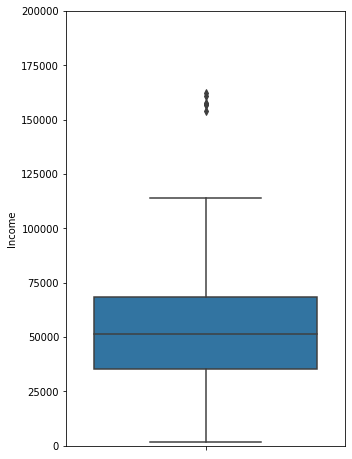

In [ ]:
plt.figure(figsize=(5,8))
sn.boxplot(y=data_segm['Income'], orient="v")
plt.ylim(0,200000)

(0.0, 3000.0)

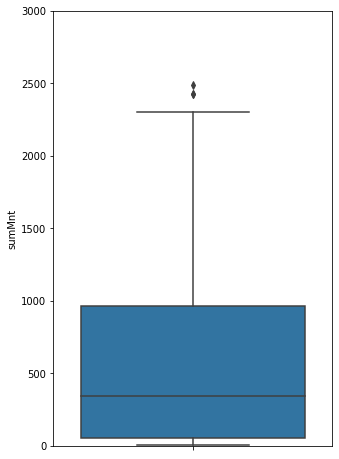

In [ ]:
plt.figure(figsize=(5,8))
sn.boxplot(y=data_segm['sumMnt'], orient="v")
plt.ylim(0,3000)

(0.0, 60.0)

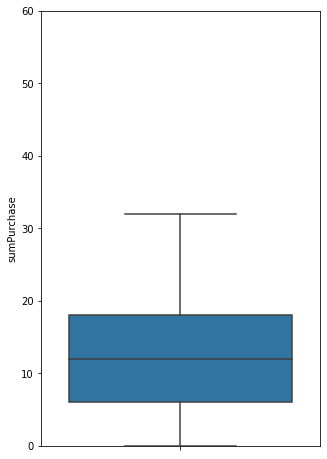

In [ ]:
plt.figure(figsize=(5,8))
sn.boxplot(y=data_segm['sumPurchase'], orient="v")
plt.ylim(0,60)

#Implementación de modelo predictivo

##Completar datos y codificar registros

In [ ]:
#Buscando datos perdidos
incomplete_rows = data[data.isnull().any(axis=1)]
#incomplete_rows = data.isnull().sum()
incomplete_rows.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0


Se verifica detecta que la columna "Income" tiene datos vacios.

Algunas opciones para lidiar con datos perdidos:
  1. Quitar filas (instancias con característica perdida)
  2. Quitar columnas (se elimina la característica completa si presenta datos perdidos)
  3. Se estiman los valores perdidos mediante mediana, promedio, moda, o estimaciones por vecindario.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


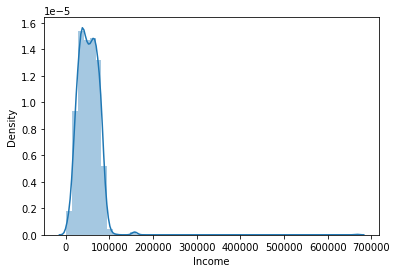

In [ ]:
sn.distplot(data['Income'])

Se grafica la distribucion de la variable "Income" para conocer su comportamiennto.

Se evidecia que tiene una distribucion normal por lo tanto se puede completar los datos con la media.

In [ ]:
mean = data['Income'].mean()
data_code = data
data_code['Income'].fillna(mean,inplace=True)
data_code.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Se completan los datos y se verifica que no hayan mas registros vacios.

In [ ]:
data_code['Dt_Customer'] = data_code['Dt_Customer'].replace(regex={"-":""}).astype(float)
data_code.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,20120904.0,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,20140308.0,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,20130821.0,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,20140210.0,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,20140119.0,94,173,...,5,0,0,0,0,0,0,3,11,0


Se codifica el campo de fecha

In [ ]:
O_Encoder = OrdinalEncoder()

V_cate = ['Education','Marital_Status']

data_code[V_cate] = O_Encoder.fit_transform(data_code[V_cate])
print(O_Encoder.categories_,"\n")
data_code.head(5)

[array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object), array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
       'Widow', 'YOLO'], dtype=object)] 



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2.0,4.0,58138.0,0,0,20120904.0,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2.0,4.0,46344.0,1,1,20140308.0,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2.0,5.0,71613.0,0,0,20130821.0,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2.0,5.0,26646.0,1,0,20140210.0,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4.0,3.0,58293.0,1,0,20140119.0,94,173,...,5,0,0,0,0,0,0,3,11,0


Se codifican los atributos Education y Maritial_Status

In [ ]:
data_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   float64
 3   Marital_Status       2240 non-null   float64
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   float64
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Se verifica que todos los registros sean numéricos

In [ ]:
data_code = data_code.drop(['Z_CostContact','Z_Revenue','ID','Dt_Customer'],axis=1)
data_code.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,2.0,4.0,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,2.0,4.0,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,2.0,5.0,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,2.0,5.0,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,4.0,3.0,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


Se eliminan los registros que no son relevantes para el entrenamiento y analisis del modelo predictivo

In [ ]:
Xdata = data_code.drop(['Response'], axis=1)
Ydata = data_code['Response']
print(Xdata.shape,Ydata.shape)

(2240, 24) (2240,)


Se extraen los conjuntos de entrenamiento (Xdata y Ydata)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split (Xdata, Ydata, test_size=0.3) #Se define el conjuto de test y de train para el etrenamiento del modelo
print("Conjunto de datos para el entrenamiento del modelo:",Xtrain.shape, ytrain.shape)
print("Conjunto de datos para el testing del modelo:",Xtest.shape, ytest.shape)

Conjunto de datos para el entrenamiento del modelo: (1568, 24) (1568,)
Conjunto de datos para el testing del modelo: (672, 24) (672,)


Se define el conjunto de test en 30% para realizar las validaciones del entrenamiento del modelo

Se implementa la validacion cruzada por la poca cantidad de datos que contiene el conjunto.

In [ ]:
steps = [[('sca', StandardScaler()), 
          ('rep', PCA()),
          ('cla', GaussianNB())],    
         
        [('sca', StandardScaler()), 
         ('rep', PCA()),
         ('cla', SGDClassifier(loss='hinge'))],    

        [('sca', StandardScaler()), 
         ('rep', PCA()),
         ('cla', SGDClassifier(loss='log'))],
    
        [('sca', StandardScaler()), 
         ('rep', PCA()),
         ('cla', SGDClassifier(loss='modified_huber'))],
    
        [('sca', StandardScaler()), 
         ('rep', PCA()),
         ('cla', LinearDiscriminantAnalysis(solver='svd'))],
    
        [('sca', StandardScaler()), 
         ('rep', PCA()),
         ('cla', LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto'))],
    
        [('sca', StandardScaler()), 
         ('rep', PCA()),
         ('cla', QuadraticDiscriminantAnalysis(store_covariance=True))],
    
        [('sca', StandardScaler()), 
         ('rep', PCA()),
         ('cla', LogisticRegression(solver='lbfgs'))],
                                         
        [('sca', StandardScaler()), 
         ('rep', PCA()),
         ('cla', LogisticRegression(solver='newton-cg'))],
    
        [('sca', StandardScaler()), 
         ('rep', PCA()),
         ('cla', SVC(kernel='rbf'))],
    
        [('sca', StandardScaler()), 
         ('rep', PCA()),
         ('cla', SVC(kernel='sigmoid', decision_function_shape='ovo'))],
    
        [('sca', StandardScaler()), 
         ('rep', PCA()),
         ('cla', RandomForestClassifier(max_features='auto'))]]

parameters = [
    
    {'rep__n_components': [0.1, 0.5, 0.9]},
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'cla__alpha': [0.0001, 0.1, 0.5, 1]},
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'cla__alpha': [0.0001, 0.1, 0.5, 1]},
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'cla__alpha': [0.0001, 0.1, 0.5, 1],
     'cla__epsilon': [0.1, 0.5, 0.9]},
    
    {'rep__n_components': [0.1, 0.5, 0.9]},
    
    {'rep__n_components': [0.1, 0.5, 0.9]},
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'cla__reg_param': [0, 0.5, 1]},
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'cla__C': [0.1, 0.5, 1]},
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'cla__C': [0.1, 0.5, 1]},
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'cla__C': [0.1, 0.5, 1]},
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'cla__C': [0.1, 0.5, 1]},
    
    {'rep__n_components': [0.1, 0.5, 0.9],
     'cla__n_estimators': [20, 100, 300, 500]}]

label_models = [
    'Naive',
    'SGD_hinge',
    'SGD_log',
    'SGD_huber',
    'LDA_svd',
    'LDA_eigen',
    'QDA',
    'Log_lbfgs',
    'Log_newton',
    'SVC_rbf',
    'SVC_sigmoid',
    'RandFo_auto',]
    
len(steps)

12

Se configuran los pasos que va a seguir el PipeLine en un diccionario, con los modelos que se prentenden evaluar.

Se configura la variacion de los parametros para que el GridSearch realice los respectivos Cruces

In [ ]:
best_model = []

for i in range(len(steps)):
    print('modelo %d/%d' % (i+1, len(steps)), label_models[i])
    grid_search = GridSearchCV(Pipeline(steps[i]), parameters[i], n_jobs=4, cv=10, scoring='accuracy', verbose=5)
    grid_search.fit(Xtrain, ytrain)
    print('Score: ', grid_search.best_score_)
    
    #mejor modelo entrenado
    best_model += [grid_search.best_estimator_]

print('Mejores modelos:\n')
best_model

modelo 1/12 Naive
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Score:  0.8577862159072349
modelo 2/12 SGD_hinge
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Score:  0.8724644781969623
modelo 3/12 SGD_log
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Score:  0.8718193695900702
modelo 4/12 SGD_huber
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Score:  0.8826678098971092
modelo 5/12 LDA_svd
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Score:  0.8743712232565736
modelo 6/12 LDA_eigen
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Score:  0.8794749305895804
modelo 7/12 QDA
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Score:  0.8615915400947248
modelo 8/12 Log_lbfgs
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Score:  0.882010452392618
modelo 9/12 Log_newton
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Score:  0.882010452392618
modelo 10/12 SVC_rb

[Pipeline(steps=[('sca', StandardScaler()), ('rep', PCA(n_components=0.1)),
                 ('cla', GaussianNB())]),
 Pipeline(steps=[('sca', StandardScaler()), ('rep', PCA(n_components=0.9)),
                 ('cla', SGDClassifier(alpha=0.1))]),
 Pipeline(steps=[('sca', StandardScaler()), ('rep', PCA(n_components=0.9)),
                 ('cla', SGDClassifier(alpha=0.1, loss='log'))]),
 Pipeline(steps=[('sca', StandardScaler()), ('rep', PCA(n_components=0.9)),
                 ('cla',
                  SGDClassifier(alpha=0.1, epsilon=0.9, loss='modified_huber'))]),
 Pipeline(steps=[('sca', StandardScaler()), ('rep', PCA(n_components=0.9)),
                 ('cla', LinearDiscriminantAnalysis())]),
 Pipeline(steps=[('sca', StandardScaler()), ('rep', PCA(n_components=0.9)),
                 ('cla',
                  LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen'))]),
 Pipeline(steps=[('sca', StandardScaler()), ('rep', PCA(n_components=0.5)),
                 ('cla',
       

Se realiza Validación Cruzada y se extraen los mejores modelos con los mejores parametros que arroja el cruce

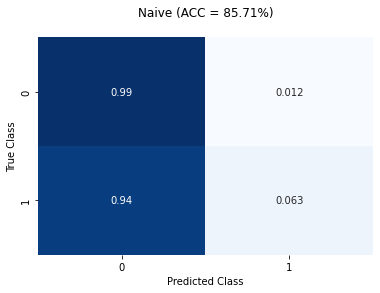


               precision    recall  f1-score   support

           0       0.86      0.99      0.92       577
           1       0.46      0.06      0.11        95

    accuracy                           0.86       672
   macro avg       0.66      0.53      0.52       672
weighted avg       0.81      0.86      0.81       672



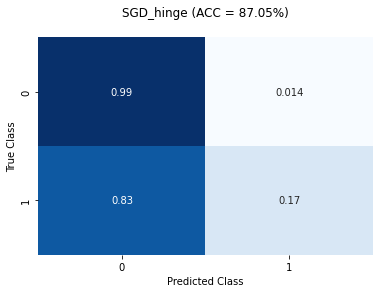


               precision    recall  f1-score   support

           0       0.88      0.99      0.93       577
           1       0.67      0.17      0.27        95

    accuracy                           0.87       672
   macro avg       0.77      0.58      0.60       672
weighted avg       0.85      0.87      0.84       672



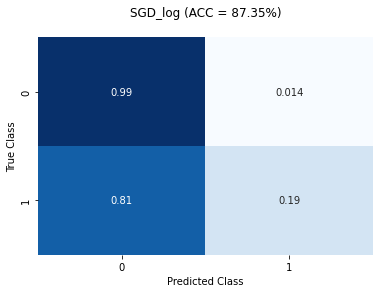


               precision    recall  f1-score   support

           0       0.88      0.99      0.93       577
           1       0.69      0.19      0.30        95

    accuracy                           0.87       672
   macro avg       0.79      0.59      0.61       672
weighted avg       0.85      0.87      0.84       672



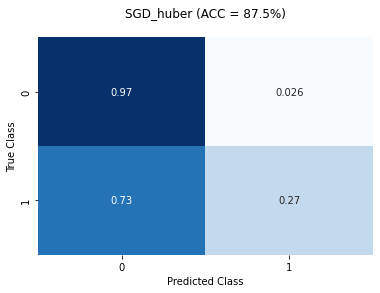


               precision    recall  f1-score   support

           0       0.89      0.97      0.93       577
           1       0.63      0.27      0.38        95

    accuracy                           0.88       672
   macro avg       0.76      0.62      0.66       672
weighted avg       0.85      0.88      0.85       672



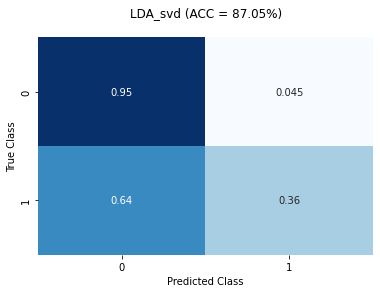


               precision    recall  f1-score   support

           0       0.90      0.95      0.93       577
           1       0.57      0.36      0.44        95

    accuracy                           0.87       672
   macro avg       0.73      0.66      0.68       672
weighted avg       0.85      0.87      0.86       672



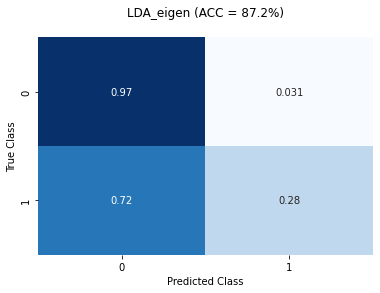


               precision    recall  f1-score   support

           0       0.89      0.97      0.93       577
           1       0.60      0.28      0.39        95

    accuracy                           0.87       672
   macro avg       0.75      0.63      0.66       672
weighted avg       0.85      0.87      0.85       672



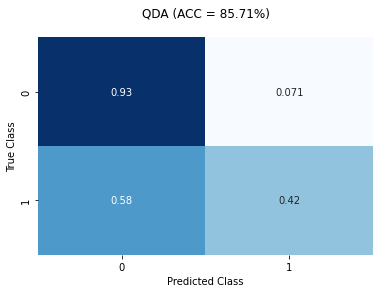


               precision    recall  f1-score   support

           0       0.91      0.93      0.92       577
           1       0.49      0.42      0.45        95

    accuracy                           0.86       672
   macro avg       0.70      0.67      0.69       672
weighted avg       0.85      0.86      0.85       672



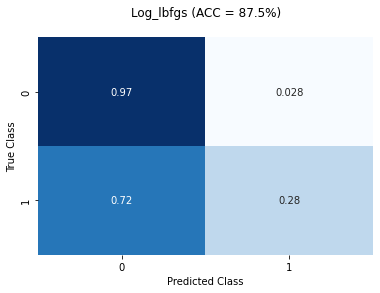


               precision    recall  f1-score   support

           0       0.89      0.97      0.93       577
           1       0.63      0.28      0.39        95

    accuracy                           0.88       672
   macro avg       0.76      0.63      0.66       672
weighted avg       0.85      0.88      0.85       672



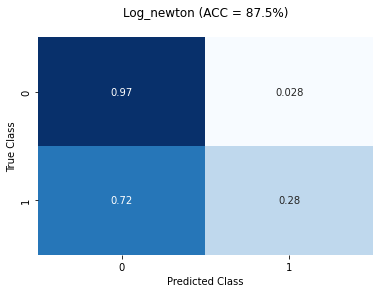


               precision    recall  f1-score   support

           0       0.89      0.97      0.93       577
           1       0.63      0.28      0.39        95

    accuracy                           0.88       672
   macro avg       0.76      0.63      0.66       672
weighted avg       0.85      0.88      0.85       672



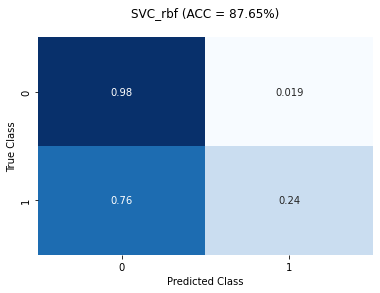


               precision    recall  f1-score   support

           0       0.89      0.98      0.93       577
           1       0.68      0.24      0.36        95

    accuracy                           0.88       672
   macro avg       0.78      0.61      0.64       672
weighted avg       0.86      0.88      0.85       672



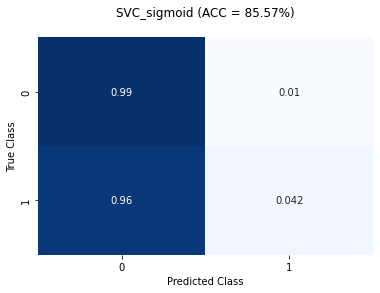


               precision    recall  f1-score   support

           0       0.86      0.99      0.92       577
           1       0.40      0.04      0.08        95

    accuracy                           0.86       672
   macro avg       0.63      0.52      0.50       672
weighted avg       0.80      0.86      0.80       672



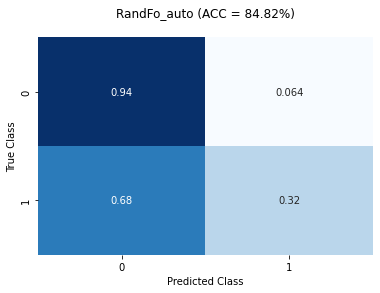


               precision    recall  f1-score   support

           0       0.89      0.94      0.91       577
           1       0.45      0.32      0.37        95

    accuracy                           0.85       672
   macro avg       0.67      0.63      0.64       672
weighted avg       0.83      0.85      0.84       672



In [ ]:
for i in range (len(best_model)):
  
  y_pred = best_model[i].predict(Xtest)
  accur = accuracy_score(ytest,y_pred)
  title = label_models[i] + " (ACC = " + str(round((accur*100),2)) + "%)\n"

  con_mtx = confusion_matrix(ytest, y_pred, normalize='true')
  con_mtx_dt = pd.DataFrame(con_mtx)
  sn.heatmap(con_mtx_dt, annot=True, cbar=None, cmap="Blues")
  plt.title(title)
  plt.ylabel("True Class"), plt.xlabel("Predicted Class")
  #s.set(xlabel='')

  plt.show()
  Clf_Rep = classification_report(ytest, y_pred)
  print("\n",Clf_Rep)

Revisamos el acierto que tiene cada modelo, implementanado la matriz de confución

Se puede evidenciar que los mejores modelos son QDA, LDA_Svd y RandFo

Se seleccionan los modelos QDA, LDA_Svd y Rand_Fo

In [ ]:
def plot_roc_curve(fpr_QDA, tpr_QDA, fpr_LDA, tpr_LDA, fpr_RandFo, tpr_RandFo):  
    plt.figure(figsize=[10,8])
    plt.plot(fpr_QDA, tpr_QDA, color='orange', label='ROC_1_QDA')
    plt.plot(fpr_LDA, tpr_LDA, color='red', label='ROC_1_LDA')
    plt.plot(fpr_RandFo, tpr_RandFo, color='green', label='ROC_1_RandFo')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
QDAModel = best_model[7]  #Se selecciona el modelo QDA
Y_pred_QDA = QDAModel.predict_proba(Xtest)

Y_pred_Prob_QDA = Y_pred_QDA[:,1] #Probabilidad de que el cliente sea marcado como que compra

In [ ]:
LDAModel = best_model[5]  #Se selecciona el modelo LDA
Y_pred_LDA = LDAModel.predict_proba(Xtest)

Y_pred_Prob_LDA = Y_pred_LDA[:,1] #Probabilidad de que el cliente sea marcado como que compra

In [ ]:
RandFoModel = best_model[6]  #Se selecciona el modelo RandFo
Y_pred_RandFo = RandFoModel.predict_proba(Xtest)

Y_pred_Prob_RandFo = Y_pred_RandFo[:,1] #Probabilidad de que el cliente sea marcado como que compra

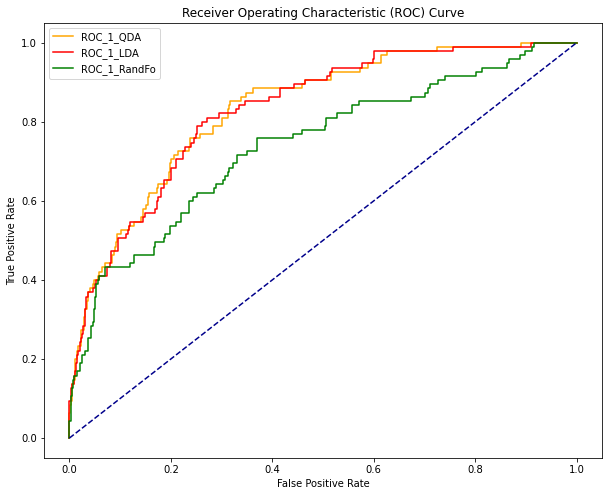

In [ ]:
false_pos_QDA, true_pos_QDA, thresholds = roc_curve(ytest, Y_pred_Prob_QDA) #Falsos positivos y Verdaderos positivos para modelo QDA
false_pos_LDA, true_pos_LDA, thresholds = roc_curve(ytest, Y_pred_Prob_LDA) #Falsos positivos y Verdaderos positivos para modelo LDA
false_pos_RandFo, true_pos_RandFo, thresholds = roc_curve(ytest, Y_pred_Prob_RandFo) #Falsos positivos y Verdaderos positivos para modelo RandFo


plot_roc_curve(false_pos_QDA, true_pos_QDA, false_pos_LDA, true_pos_LDA, false_pos_RandFo, true_pos_RandFo)

Observando el comportamiento de las curvas ROC de los 3 modelos seleccionados, se determia que el mejor modelo es el de QDA

In [ ]:
joblib.dump(QDAModel, 'Modelo_Entrenado.pkl')

['Modelo_Entrenado.pkl']

Guardar el modelo entrenado para su cargue y ejecución

In [ ]:
Modelo = joblib.load('Modelo_Entrenado.pkl')

In [ ]:
Xtest.shape

(672, 24)

In [ ]:
Y_predict = Modelo.predict(Xtest)
Y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
DataOut = pd.DataFrame(Xtest,columns=['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain'])
DataOut.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
324,1953,2.0,4.0,40464.0,0,1,78,424,17,118,...,8,2,8,8,0,0,0,0,0,0
96,1960,2.0,6.0,47916.0,0,1,72,505,0,26,...,7,4,6,6,0,1,0,0,0,0
2104,1972,1.0,3.0,14188.0,0,0,40,2,7,11,...,2,0,4,6,0,0,0,0,0,0
1259,1969,2.0,5.0,76653.0,0,0,91,736,63,946,...,4,7,11,2,0,0,1,1,0,0
1061,1958,2.0,5.0,65196.0,0,2,34,743,19,181,...,7,6,11,5,1,0,0,0,0,0


In [ ]:
Y_predict_DT = pd.DataFrame(Y_predict)
Y_predict_DT.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
DataOut.insert(24, "Potential Buyers", Y_predict_DT, allow_duplicates=True)
DataOut.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Potential Buyers
324,1953,2.0,4.0,40464.0,0,1,78,424,17,118,...,2,8,8,0,0,0,0,0,0,0
96,1960,2.0,6.0,47916.0,0,1,72,505,0,26,...,4,6,6,0,1,0,0,0,0,0
2104,1972,1.0,3.0,14188.0,0,0,40,2,7,11,...,0,4,6,0,0,0,0,0,0,0
1259,1969,2.0,5.0,76653.0,0,0,91,736,63,946,...,7,11,2,0,0,1,1,0,0,0
1061,1958,2.0,5.0,65196.0,0,2,34,743,19,181,...,6,11,5,1,0,0,0,0,0,0


In [39]:
DataOut.to_csv('PotencialesCompradores.csv', index=False)

#Conclusiones

Debido a que el data set no se encuentra balanceado (existen más casos de NO compra que de compra), se determinó que el modelo tiene mayor precisión para identificar a NO compradores que a Compradores, sin embargo conforme avanzan las campañas de markting se esperara que la cantidad de Compradores aumente y el DataSet equilibre cada vez más, por ende la predicción será más precisa.